In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv

import contractions
import nltk
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import re 

In [2]:
df = pd.read_csv('sg_start.csv')

In [3]:
df

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/eviltofu/status/1245062921...,2020-03-31 18:58:27+00:00,another effect fatal older member society lose...,another effect fatal older member society lose...,1245062921639477249,https://twitter.com/eviltofu,0,0,1,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.89216999988, latitud...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/MhManto/status/12450092195...,2020-03-31 15:25:03+00:00,industry impact live mobile world live,industry impact live mobile world live,1245009219515871233,https://twitter.com/MhManto,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Covid-19 industry impact: L...,NaN,NaN
2,https://twitter.com/lili_eyebags/status/124500...,2020-03-31 15:21:28+00:00,new case singapore new cluster identified dorm...,new case singapore new cluster identified dorm...,1245008318810058759,https://twitter.com/lili_eyebags,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='47 new COVID-19 cases in Si...,NaN,NaN
3,https://twitter.com/CoastalLabNTU/status/12449...,2020-03-31 13:31:43+00:00,covid otter gang war singapore,covid otter gang war singapore,1244980698764603392,https://twitter.com/CoastalLabNTU,0,1,3,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...",NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/jimmyjemii/status/12449564...,2020-03-31 11:55:33+00:00,many year coming untuk buka bazar ramadhan ple...,many year coming untuk buka bazar ramadhan ple...,1244956494585417729,https://twitter.com/jimmyjemii,0,4,6,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.543741, latitude=1.3...","Place(id='72d5ecacd2d3a055', fullName='Pulai, ...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,https://twitter.com/DavidAustinSing/status/121...,2020-01-22 09:01:00+00:00,wuhan coronavirus spreading world leader gathe...,wuhan coronavirus spreading world leader gathe...,1219907806553243648,https://twitter.com/DavidAustinSing,0,0,2,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...","['governance', 'healthcare']",NaN,NaN,NaN,NaN
2162,https://twitter.com/ArvinTunas/status/12198001...,2020-01-22 01:53:20+00:00,moh came advisory novel coronavirus go,moh came advisory novel coronavirus go,1219800180750372866,https://twitter.com/ArvinTunas,1,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.89216999988, latitud...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN
2163,https://twitter.com/DanielYorkLoh/status/12197...,2020-01-21 20:30:55+00:00,really hope sort thing could spread like wildf...,really hope sort thing could spread like wildf...,1219719042933481473,https://twitter.com/DanielYorkLoh,0,1,3,0,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",['coronavirus'],NaN,NaN,NaN,NaN
2164,https://twitter.com/TmarcoH/status/12196543370...,2020-01-21 16:13:48+00:00,wuhan virus visual explainer via scmpgraphics ...,wuhan virus visual explainer via scmpgraphics ...,1219654337015582721,https://twitter.com/TmarcoH,0,3,4,0,...,NaN,NaN,"[User(username='SCMPgraphics', id=2556393734, ...","Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...","['WuhanPneumonia', 'coronavirus', 'wuhanvirus']",NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

url                    0
date                   0
rawContent             4
renderedContent        4
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
links               1350
media               1735
retweetedTweet      2166
quotedTweet         1922
inReplyToTweetId    1946
inReplyToUser       1946
mentionedUsers      1676
coordinates            1
place                  0
hashtags            1170
cashtags            2163
card                1924
viewCount           2166
vibe                2166
dtype: int64

In [3]:
df['rawContent'].fillna('', inplace=True)
df['renderedContent'].fillna('', inplace=True)

In [4]:
## remove specific word HTTP
df['rawContent'] = df['rawContent'].str.replace('covid', '')
df['rawContent'] = df['rawContent'].str.replace('coronavirus', '')

df['renderedContent'] = df['renderedContent'].str.replace('covid', '')
df['renderedContent'] = df['renderedContent'].str.replace('coronavirus', '')

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

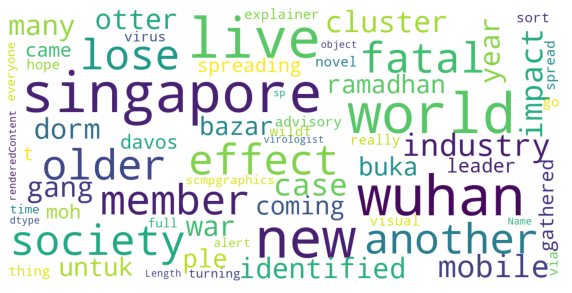

In [8]:
show_wordcloud(df["renderedContent"])

In [5]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [6]:
data = df['renderedContent'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['another', 'effect', 'fatal', 'older', 'member', 'society', 'lose', 'wisdom', 'experience', 'generation']


## Building Bi-gram and Tri-gram Models

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [8]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
data_words_bigrams = make_bigrams(data_words)
data_words_bigrams

[['another',
  'effect',
  'fatal',
  'older',
  'member',
  'society',
  'lose',
  'wisdom',
  'experience',
  'generation'],
 ['industry', 'impact', 'live', 'mobile', 'world', 'live'],
 ['new',
  'case',
  'singapore',
  'new',
  'cluster',
  'identified',
  'dormitory',
  'toh',
  'guan'],
 ['otter', 'gang', 'war', 'singapore'],
 ['many',
  'year',
  'coming',
  'untuk',
  'buka',
  'bazar',
  'ramadhan',
  'please',
  'ban',
  'activity',
  'lead',
  'mass',
  'gathering',
  'people',
  'need',
  'flatten',
  'curve'],
 ['individual',
  'apply',
  'bank',
  'amp',
  'insurer',
  'defer',
  'repayment',
  'property',
  'loan',
  'well',
  'premium',
  'payment',
  'life',
  'amp',
  'health',
  'insurance',
  'plan',
  'part',
  'package',
  'measure',
  'ease',
  'financial',
  'strain',
  'arising',
  'outbreak',
  'ma',
  'sme'],
 ['people',
  'actually',
  'think',
  'okay',
  'people',
  'die',
  'protect',
  'economy',
  'wtf',
  'realise',
  'economy',
  'made',
  'call',
  '

In [9]:
data_words_trigrams = make_trigrams(data_words)
data_words_trigrams

[['another',
  'effect',
  'fatal',
  'older',
  'member',
  'society',
  'lose',
  'wisdom',
  'experience',
  'generation'],
 ['industry', 'impact', 'live', 'mobile', 'world', 'live'],
 ['new',
  'case',
  'singapore',
  'new',
  'cluster',
  'identified',
  'dormitory',
  'toh',
  'guan'],
 ['otter', 'gang', 'war', 'singapore'],
 ['many',
  'year',
  'coming',
  'untuk',
  'buka',
  'bazar',
  'ramadhan',
  'please',
  'ban',
  'activity',
  'lead',
  'mass',
  'gathering',
  'people',
  'need',
  'flatten',
  'curve'],
 ['individual',
  'apply',
  'bank',
  'amp',
  'insurer',
  'defer',
  'repayment',
  'property',
  'loan',
  'well',
  'premium',
  'payment',
  'life',
  'amp',
  'health',
  'insurance',
  'plan',
  'part',
  'package',
  'measure',
  'ease',
  'financial',
  'strain',
  'arising',
  'outbreak',
  'ma',
  'sme'],
 ['people',
  'actually',
  'think',
  'okay',
  'people',
  'die',
  'protect',
  'economy',
  'wtf',
  'realise',
  'economy',
  'made',
  'call',
  '

## Building rough LDA model 

In [10]:
import gensim
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [16]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [17]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"china" + 0.007*"outbreak" + 0.007*"wuhan" + 0.006*"new" + '
  '0.005*"world" + 0.005*"case" + 0.005*"like" + 0.004*"singapore" + '
  '0.004*"year" + 0.004*"work"'),
 (1,
  '0.015*"singapore" + 0.009*"people" + 0.006*"virus" + 0.004*"outbreak" + '
  '0.004*"take" + 0.004*"good" + 0.004*"china" + 0.004*"amp" + 0.004*"case" + '
  '0.004*"please"'),
 (2,
  '0.021*"singapore" + 0.009*"case" + 0.009*"time" + 0.007*"home" + '
  '0.006*"stay" + 0.006*"people" + 0.006*"amp" + 0.005*"new" + 0.005*"due" + '
  '0.004*"go"'),
 (3,
  '0.025*"singapore" + 0.010*"case" + 0.009*"outbreak" + 0.008*"china" + '
  '0.006*"stay" + 0.006*"need" + 0.006*"safe" + 0.006*"wuhan" + 0.006*"like" + '
  '0.005*"people"'),
 (4,
  '0.007*"singapore" + 0.006*"get" + 0.005*"help" + 0.005*"amp" + 0.005*"take" '
  '+ 0.005*"via" + 0.005*"outbreak" + 0.004*"government" + 0.004*"world" + '
  '0.004*"one"')]


In [18]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.20134844396920903


## Tuning based on number of topics

In [19]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
       
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    # Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [20]:
# Can take a long time to run. In this case we are going to k_max=14.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

coherence_scores = []
model_topics = []

for k in range(2, 20):
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word,k=k) 
    model_topics.append(k)    
    coherence_scores.append(cv)    
    print("#Topics: " + str(k) + ", Score: " + str(coherence_scores[-1]))

print(datetime.datetime.now())

2023-03-11 20:53:30.993247
#Topics: 2, Score: 0.11614930098589421
#Topics: 3, Score: 0.13916599194845694
#Topics: 4, Score: 0.2321632008382636
#Topics: 5, Score: 0.22472281070865657
#Topics: 6, Score: 0.244886921001958
#Topics: 7, Score: 0.28183509074458685
#Topics: 8, Score: 0.3112256414867556
#Topics: 9, Score: 0.28328454531987574
#Topics: 10, Score: 0.3225082563711389
#Topics: 11, Score: 0.31131760610590625
#Topics: 12, Score: 0.3594704066435421
#Topics: 13, Score: 0.34876503753965776
#Topics: 14, Score: 0.3777632502790091
#Topics: 15, Score: 0.36178991268423105
#Topics: 16, Score: 0.38927388061192497
#Topics: 17, Score: 0.3874874599386062
#Topics: 18, Score: 0.41405559606528447
#Topics: 19, Score: 0.4133156629671846
2023-03-11 20:55:13.904550


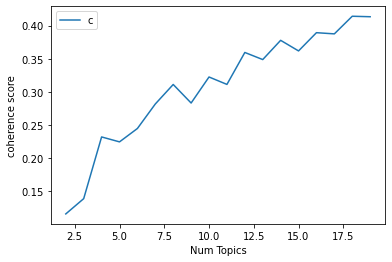

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence score"), loc='best')
plt.show()

### Final Model

In [12]:
num_topics = 18

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)

In [13]:
# Save the LDA model

from gensim.test.utils import datapath

lda_model_saved_file = datapath("sg_start_lda_model_18")
lda_model.save(lda_model_saved_file)

In [26]:
score = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
score.get_coherence()

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.3931227686899176

In [27]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda_model/sg_start_lda_vis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda_vis/sg_start_lda_vis_tuned_'+ str(num_topics) +'.html')

LDAvis_prepared

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3     -0.111911  0.015695       1        1  8.895145
16    -0.091158 -0.031830       2        1  8.611418
13    -0.095299 -0.102031       3        1  7.583495
15    -0.034152  0.090035       4        1  7.460601
5     -0.068558 -0.092229       5        1  7.130263
1     -0.062257  0.030912       6        1  6.868033
14    -0.009876  0.100483       7        1  5.718568
12    -0.043486 -0.056062       8        1  5.509168
7     -0.038102  0.076199       9        1  5.436679
2      0.012425 -0.037210      10        1  5.103690
11    -0.009117 -0.029340      11        1  4.967798
9      0.077373 -0.036328      12        1  4.562903
17     0.007887  0.124919      13        1  4.388723
6      0.048774  0.004130      14        1  4.126941
10     0.114806 -0.100388      15        1  4.018918
4      0.068828  0.020050      16        1  3.849855
8      0.094856  0.044561      17        1  3.113506
0      0.138969 -0.021566      18        1  2.654297, topic_info=          Term        Freq       Total Category  logprob  loglift
1583     wuhan   77.000000   77.000000  Default  30.0000  30.0000
178      china  147.000000  147.000000  Default  29.0000  29.0000
861       mask   69.000000   69.000000  Default  28.0000  28.0000
15        case  166.000000  166.000000  Default  27.0000  27.0000
785     update   47.000000   47.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
14       world    3.550909   93.248033  Topic18  -5.2574   0.3609
42        year    3.200612   48.186394  Topic18  -5.3613   0.9173
713   together    2.640744   16.181856  Topic18  -5.5536   1.8162
498        via    2.862568   63.357377  Topic18  -5.4729   0.5319
944        flu    2.567180   18.687939  Topic18  -5.5818   1.6439

[1186 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4823     16  0.713914    absolute
3208      2  0.238591  absolutely
3208     11  0.715773  absolutely
5233     10  0.758329      absurd
1603      2  0.907642   according
...     ...       ...         ...
399      14  0.054228         yet
399      16  0.216911         yet
2428     15  0.618132     youtube
3476     10  0.927546          yr
1126     12  0.708963        zone

[2887 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 17, 14, 16, 6, 2, 15, 13, 8, 3, 12, 10, 18, 7, 11, 5, 9, 1])

**Added Sentiment Analysis**

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [12]:
def determine_sentiment(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

In [13]:
df["renderedContent"] = df['renderedContent'].apply(lambda tweet:str(tweet))
sentiment_scores = df['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

0       {'neg': 0.373, 'neu': 0.422, 'pos': 0.205, 'co...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3       {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'comp...
4       {'neg': 0.172, 'neu': 0.718, 'pos': 0.11, 'com...
                              ...                        
2161    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2162    {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...
2163    {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...
2164    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2165    {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...
Name: renderedContent, Length: 2166, dtype: object

In [14]:
# Load the saved model

from gensim.test.utils import datapath
lda_model_saved_file = datapath("sg_start_lda_model_18")
lda_model = gensim.models.ldamodel.LdaModel.load(lda_model_saved_file)

In [15]:
topics, num_topics = [], 18

for i in range(len(corpus)):
    top_topics = (
        lda_model.get_document_topics(corpus[i],
                                      minimum_probability=0.0))
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    topics.append(topic_vec.index(max(topic_vec))+1)
    
topics

[12,
 6,
 8,
 15,
 10,
 16,
 10,
 17,
 2,
 17,
 14,
 12,
 10,
 3,
 1,
 1,
 16,
 3,
 12,
 17,
 5,
 7,
 9,
 12,
 12,
 3,
 8,
 16,
 13,
 16,
 17,
 4,
 11,
 6,
 5,
 13,
 4,
 2,
 8,
 3,
 10,
 2,
 11,
 12,
 16,
 16,
 15,
 15,
 17,
 5,
 3,
 8,
 8,
 2,
 12,
 13,
 3,
 18,
 11,
 16,
 18,
 18,
 11,
 18,
 12,
 3,
 15,
 8,
 17,
 10,
 2,
 9,
 8,
 1,
 5,
 10,
 1,
 3,
 12,
 16,
 10,
 16,
 17,
 11,
 6,
 2,
 16,
 14,
 17,
 9,
 6,
 4,
 1,
 8,
 1,
 17,
 18,
 13,
 1,
 4,
 14,
 12,
 8,
 15,
 4,
 7,
 15,
 4,
 2,
 9,
 14,
 13,
 8,
 3,
 14,
 7,
 18,
 16,
 4,
 12,
 8,
 13,
 9,
 9,
 11,
 3,
 8,
 1,
 13,
 16,
 9,
 12,
 9,
 11,
 7,
 5,
 6,
 4,
 4,
 2,
 16,
 6,
 7,
 10,
 14,
 1,
 13,
 6,
 6,
 4,
 12,
 13,
 3,
 7,
 12,
 2,
 2,
 12,
 15,
 9,
 14,
 4,
 13,
 5,
 17,
 12,
 15,
 6,
 8,
 10,
 2,
 10,
 17,
 16,
 11,
 16,
 13,
 18,
 16,
 3,
 16,
 3,
 13,
 13,
 6,
 8,
 8,
 14,
 14,
 6,
 16,
 3,
 1,
 6,
 1,
 2,
 5,
 3,
 4,
 12,
 13,
 2,
 8,
 15,
 12,
 1,
 13,
 4,
 15,
 1,
 17,
 6,
 10,
 4,
 2,
 17,
 18,
 13,
 13,
 13,
 17,
 1

In [16]:
df["Topic"] = topics
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic
0,https://twitter.com/eviltofu/status/1245062921...,2020-03-31 18:58:27+00:00,another effect fatal older member society lose...,another effect fatal older member society lose...,1245062921639477249,https://twitter.com/eviltofu,0,0,1,0,...,NaN,NaN,"Coordinates(longitude=103.89216999988, latitud...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN,12
1,https://twitter.com/MhManto/status/12450092195...,2020-03-31 15:25:03+00:00,industry impact live mobile world live,industry impact live mobile world live,1245009219515871233,https://twitter.com/MhManto,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Covid-19 industry impact: L...,NaN,NaN,6
2,https://twitter.com/lili_eyebags/status/124500...,2020-03-31 15:21:28+00:00,new case singapore new cluster identified dorm...,new case singapore new cluster identified dorm...,1245008318810058759,https://twitter.com/lili_eyebags,0,0,0,0,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='47 new COVID-19 cases in Si...,NaN,NaN,8
3,https://twitter.com/CoastalLabNTU/status/12449...,2020-03-31 13:31:43+00:00,otter gang war singapore,otter gang war singapore,1244980698764603392,https://twitter.com/CoastalLabNTU,0,1,3,0,...,NaN,NaN,"Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...",NaN,NaN,NaN,NaN,NaN,15
4,https://twitter.com/jimmyjemii/status/12449564...,2020-03-31 11:55:33+00:00,many year coming untuk buka bazar ramadhan ple...,many year coming untuk buka bazar ramadhan ple...,1244956494585417729,https://twitter.com/jimmyjemii,0,4,6,0,...,NaN,NaN,"Coordinates(longitude=103.543741, latitude=1.3...","Place(id='72d5ecacd2d3a055', fullName='Pulai, ...",NaN,NaN,NaN,NaN,NaN,10


In [17]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
df["Sentiment"] = sentiment_label
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic,Sentiment
0,https://twitter.com/eviltofu/status/1245062921...,2020-03-31 18:58:27+00:00,another effect fatal older member society lose...,another effect fatal older member society lose...,1245062921639477249,https://twitter.com/eviltofu,0,0,1,0,...,NaN,"Coordinates(longitude=103.89216999988, latitud...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN,12,Negative
1,https://twitter.com/MhManto/status/12450092195...,2020-03-31 15:25:03+00:00,industry impact live mobile world live,industry impact live mobile world live,1245009219515871233,https://twitter.com/MhManto,0,0,0,0,...,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Covid-19 industry impact: L...,NaN,NaN,6,Neutral
2,https://twitter.com/lili_eyebags/status/124500...,2020-03-31 15:21:28+00:00,new case singapore new cluster identified dorm...,new case singapore new cluster identified dorm...,1245008318810058759,https://twitter.com/lili_eyebags,0,0,0,0,...,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='47 new COVID-19 cases in Si...,NaN,NaN,8,Neutral
3,https://twitter.com/CoastalLabNTU/status/12449...,2020-03-31 13:31:43+00:00,otter gang war singapore,otter gang war singapore,1244980698764603392,https://twitter.com/CoastalLabNTU,0,1,3,0,...,NaN,"Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...",NaN,NaN,NaN,NaN,NaN,15,Negative
4,https://twitter.com/jimmyjemii/status/12449564...,2020-03-31 11:55:33+00:00,many year coming untuk buka bazar ramadhan ple...,many year coming untuk buka bazar ramadhan ple...,1244956494585417729,https://twitter.com/jimmyjemii,0,4,6,0,...,NaN,"Coordinates(longitude=103.543741, latitude=1.3...","Place(id='72d5ecacd2d3a055', fullName='Pulai, ...",NaN,NaN,NaN,NaN,NaN,10,Negative


In [18]:
for content in df[(df["Topic"] == 1) & (df["Sentiment"] == "Negative")].renderedContent:
    print(content)

outbreak see best humanity see worst simply complain standing frontlines working find solution path would take
lowering risk get infected  still go gym gor workout change fact still risk work medical field direct contact different people time social distancing sometimes applied inside consult
tell beating via youtube 
case sg increasing ngtengfong taking  patient mann terrible time
 quarantine worry beader crafting ang jewelry making answer keep boredom away staying home smart art beadedjewelry jewellerymaking
rohitbjp true story know west bengal working dubai amp returned village last week due gathered stoned house thought brought virus amp kill case spew venom twitter nri different
australia hunt cruise passenger fear
cancel vietnam trip coz sad planning trip since last year september
crisis reminds financial crisis bank started distrust economy ground hold nation state distrusting awful damage causing
thinking starting looking mortality rate flu last year look like mortality rate ti

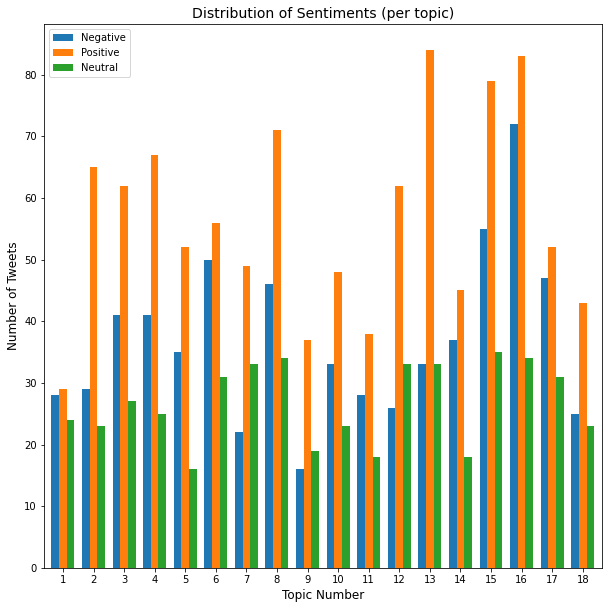

In [19]:
import matplotlib.pyplot as plt

topics = range(1, num_topics+1)
columns = ["Negative", "Positive", "Neutral"]
data = []

for i in range(num_topics):
    curr_topic = df[df["Topic"] == i+1]
    negative, positive, neutral = len(curr_topic[curr_topic["Sentiment"] == "Negative"]), len(curr_topic[curr_topic["Sentiment"] == "Positive"]), len(curr_topic[curr_topic["Sentiment"] == "Neutral"]) 
    data.append([negative, positive, neutral])

topic_sentiment_df = pd.DataFrame(data, columns=columns, index=topics)
topic_sentiment_df.plot(kind="bar", figsize=(10, 10), width=0.75)
plt.title("Distribution of Sentiments (per topic)", fontsize=14)
plt.xlabel("Topic Number", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.gca().xaxis.set_tick_params(rotation=0)
plt.show()